In [23]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations 

import matplotlib.pyplot as plt
import json
import networkx as nx 
import argparse
import config
import os 


# 0, Utility


### Generate edges 

In [24]:
num_of_agents = 4
drop_prob = 0.7 
agent_ids = np.arange(num_of_agents)
edges = list(combinations(agent_ids,2))

edges_list = []
edges_for_dropout = []
for item in edges:
    edges_list.append( list(item) )
    edges_for_dropout.append( list(item + (drop_prob,)) )

print(edges_list)
print(edges_for_dropout)

[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
[[0, 1, 0.7], [0, 2, 0.7], [0, 3, 0.7], [1, 2, 0.7], [1, 3, 0.7], [2, 3, 0.7]]


# 1, Evaluation

### 1.1 Replica

In [17]:
scene = 'office0'
#exp_name = 'Pretrain_AUQCADMM_D80_S1000'
#exp_name = 'CADMM_D80'
exp_name = 'Pretrain_CADMM_D80'
agent_id = 2
number_of_trials = 3

In [ ]:
for i in range(number_of_trials):
    print('\n')

    print(f'INPUT_MESH=output/Replica/{scene}/{exp_name}_{i+1}/agent_{agent_id}/mesh_track665.ply')
    print(f'VIRT_CAM_PATH=eval_data/Replica/{scene}/virtual_cameras')
    print(f'python cull_mesh.py --config configs/Replica/{scene}.yaml --input_mesh $INPUT_MESH --remove_occlusion --virtual_cameras --virt_cam_path $VIRT_CAM_PATH --gt_pose')

    print('\n')

    print(f'REC_MESH=output/Replica/{scene}/{exp_name}_{i+1}/agent_{agent_id}/mesh_track665_cull_virt_cams.ply')
    print(f'GT_MESH=eval_data/Replica/{scene}/gt_mesh_cull_virt_cams.ply')
    print(f'python eval_recon.py --rec_mesh $REC_MESH --gt_mesh $GT_MESH --dataset_type Replica -2d -3d')

In [19]:
# # CADMM no-pretrain
# accuracy = np.array([3.24, 2.95, 2.53, 3.46, 3.31, 3.54, 2.76, 4.35, 3.16])
# completetion = np.array([2.89, 2.69, 2.76, 3.14, 3.25, 3.23, 2.68, 3.01, 3.09])
# completetion_ratio = np.array([85.37, 87.67, 86.86, 83.08, 83.63, 83.87, 86.95, 85.71, 85.65])
# Depth = np.array([3.24, 2.92, 2.72, 3.13, 3.13, 3.08, 2.86, 4.06, 3.14])

# Pretrain CADMM
accuracy = np.array([
    (7.41, 8.45, 11.48),  # agent0
    (8.33, 7.56, 7.42),  # agent1
    (10.94, 8.32, 8.38)   # agent2
])
completetion = np.array([
    (2.78, 2.95, 3.00),  # agent0
    (2.83, 2.90, 2.85),  # agent1
    (3.45, 2.98, 2.83)   # agent2
])
completetion_ratio = np.array([
    (89.28, 88.49, 88.84),  # agent0
    (88.63, 87.65, 89.07),  # agent1
    (85.38, 88.00, 89.23)   # agent2
])
Depth = np.array([
    (3.73, 6.31, 13.74),  # agent0
    (5.42, 3.65, 4.38),  # agent1
    (8.47, 5.34, 4.56)   # agent2
])

# # ours
# accuracy = np.array([
#     (5.17, 6.92, 6.09),  # agent0
#     (3.74, 9.22, 5.82),  # agent1
#     (4.77, 8.48, 5.64)   # agent2
# ])
# completetion = np.array([
#     (2.39, 2.52, 2.47),  # agent0
#     (2.18, 2.81, 2.44),  # agent1
#     (2.29, 2.70, 2.41)   # agent2
# ])
# completetion_ratio = np.array([
#     (92.97, 92.12, 92.53),  # agent0
#     (93.28, 90.13, 92.81),  # agent1
#     (93.52, 90.87, 92.43)   # agent2
# ])
# Depth = np.array([
#     (2.95, 4.83, 3.34),  # agent0
#     (2.35, 8.12, 4.19),  # agent1
#     (3.73, 9.21, 3.71)   # agent2
# ])


# # ours new
# accuracy = np.array([3.38, 7.12, 4.38, 4.41, 2.76, 4.20, 3.93,  2.50, 4.56])
# completetion = np.array([
#     (2.11, 2.27, 2.31),  # agent0
#     (2.29, 2.10, 2.20),  # agent1
#     (2.23, 2.00, 2.15)   # agent2
# ])
# completetion_ratio = np.array([
#     (93.61, 93.88, 93.06),  # agent0
#     (92.98, 94.50, 93.40),  # agent1
#     (93.52, 94.73, 93.81)   # agent2
# ])
# Depth = np.array([
#     (2.09, 4.30, 2.48),  # agent0
#     (2.50, 2.09, 2.24),  # agent1
#     (2.63, 1.85, 2.12)   # agent2
# ])

print('Accuracy: {:.2f} ±{:.2f} '.format(np.mean(accuracy), np.std(accuracy)))
print('completetion: {:.2f} ±{:.2f} '.format(np.mean(completetion), np.std(completetion)))
print('completetion_ratio: {:.2f} ±{:.2f} '.format(np.mean(completetion_ratio), np.std(completetion_ratio)))
print('Depth: {:.2f} ±{:.2f} '.format(np.mean(Depth), np.std(Depth)))

Accuracy: 8.70 ±1.41 
completetion: 2.95 ±0.19 
completetion_ratio: 88.29 ±1.15 
Depth: 6.18 ±3.02 


### 1.2 ScanNet

In [59]:
scene = 'scene0106'
exp_name = 'DiNNO_D90'
#exp_name = 'MACIM_D90'
#exp_name = 'Ours_noW_D90'
#exp_name = 'Ours_D90'
agent_id = 3
number_of_trials = 3
last_mesh_id = 580

cull centralized mesh, which will be used as the ground truth mesh

In [6]:
last_centralized = 2323
print(f'INPUT_MESH=output/scannet/{scene}_00/Centralized/agent_0/mesh_track{last_centralized}.ply')
print(f'python cull_mesh.py --config configs/ScanNet/{scene}.yaml --input_mesh $INPUT_MESH --remove_occlusion --gt_pose')

INPUT_MESH=output/scannet/scene0106_00/Centralized/agent_0/mesh_track2323.ply
python cull_mesh.py --config configs/ScanNet/scene0106.yaml --input_mesh $INPUT_MESH --remove_occlusion --gt_pose


cull meshes and get evaluation scores

In [60]:
for i in range(number_of_trials):
    print('\n')

    print(f'INPUT_MESH=output/scannet/{scene}_00/{exp_name}_{i+1}/agent_{agent_id}/mesh_track{last_mesh_id}.ply')
    print(f'python cull_mesh.py --config configs/ScanNet/{scene}.yaml --input_mesh $INPUT_MESH --remove_occlusion --gt_pose')

    print('\n')

    print(f'REC_MESH=output/scannet/{scene}_00/{exp_name}_{i+1}/agent_{agent_id}/mesh_track{last_mesh_id}_cull_occlusion.ply')
    print(f'GT_MESH=output/scannet/{scene}_00/Centralized/agent_0/mesh_track{last_centralized}_cull_occlusion.ply')
    print(f'python eval_recon.py --rec_mesh $REC_MESH --gt_mesh $GT_MESH -3d')



INPUT_MESH=output/scannet/scene0106_00/DiNNO_D90_1/agent_3/mesh_track580.ply
python cull_mesh.py --config configs/ScanNet/scene0106.yaml --input_mesh $INPUT_MESH --remove_occlusion --gt_pose


REC_MESH=output/scannet/scene0106_00/DiNNO_D90_1/agent_3/mesh_track580_cull_occlusion.ply
GT_MESH=output/scannet/scene0106_00/Centralized/agent_0/mesh_track2323_cull_occlusion.ply
python eval_recon.py --rec_mesh $REC_MESH --gt_mesh $GT_MESH -3d


INPUT_MESH=output/scannet/scene0106_00/DiNNO_D90_2/agent_3/mesh_track580.ply
python cull_mesh.py --config configs/ScanNet/scene0106.yaml --input_mesh $INPUT_MESH --remove_occlusion --gt_pose


REC_MESH=output/scannet/scene0106_00/DiNNO_D90_2/agent_3/mesh_track580_cull_occlusion.ply
GT_MESH=output/scannet/scene0106_00/Centralized/agent_0/mesh_track2323_cull_occlusion.ply
python eval_recon.py --rec_mesh $REC_MESH --gt_mesh $GT_MESH -3d


INPUT_MESH=output/scannet/scene0106_00/DiNNO_D90_3/agent_3/mesh_track580.ply
python cull_mesh.py --config configs/Scan

In [61]:
# DiNNO
accuracy = np.array([
    (57.45, 43.89, 49.54),  # agent0
    (42.34, 35.78, 43.87),  # agent1
    (48.14, 49.57, 25.62),   # agent2
    (48.67, 21.36, 26.53),   # agent3
])
completetion = np.array([
    (20.57, 19.30, 18.02),  # agent0
    (12.79, 15.82, 15.35),  # agent1
    (18.98, 13.23, 10.33),   # agent2
    (14.18, 9.43, 11.21),   # agent3

])
completetion_ratio = np.array([
    (31.32, 34.50, 30.86),  # agent0
    (37.07, 39.07, 34.70),  # agent1
    (36.38, 37.06, 41.29),   # agent2
    (35.01, 42.19, 37.68),   # agent3
])




# # MACIM
# accuracy = np.array([
#     (30.96, 53.65, 48.27),  # agent0
#     (55.49, 33.11, 38.91),  # agent1
#     (31.04, 25.42, 36.87),   # agent2
#     (36.34, 32.10, 37.96),   # agent3
# ])
# completetion = np.array([
#     (7.38, 9.23, 7.93),  # agent0
#     (10.99, 8.06, 11.04),  # agent1
#     (6.74, 7.47, 9.20),   # agent2
#     (9.98, 9.28, 10.17),   # agent3
# ])
# completetion_ratio = np.array([
#     (54.47, 48.35, 49.66),  # agent0
#     (47.55, 51.96, 49.50),  # agent1
#     (56.94, 54.37, 53.25),   # agent2
#     (50.23, 50.73, 49.30),   # agent3
# ])


# # Ours (pretrain)
# accuracy = np.array([
#     (14.86, 14.08, 15.59),  # agent0
#     (14.01, 11.54, 14.52),  # agent1
#     (13.72, 14.54, 11.43),  # agent2
#     (14.14, 13.98, 15.69),  # agent3
# ])
# completetion = np.array([
#     (5.16, 6.18, 5.92),  # agent0
#     (5.31, 5.04, 5.64),  # agent1
#     (5.11, 7.12, 5.53),  # agent2
#     (5.60, 6.07, 6.64),  # agent3

# ])
# completetion_ratio = np.array([
#     (70.51, 69.09, 68.53),  # agent0
#     (71.01, 73.04, 68.61),  # agent1
#     (71.78, 68.37, 71.33),  # agent2
#     (68.23, 64.85, 61.62),  # agent3
# ])


# # Ours (pretrain + weight)
# accuracy = np.array([
#     (9.99, 14.05, 12.35),  # agent0
#     (10.24, 14.46, 12.15),  # agent1
#     (8.92, 8.94, 10.16),   # agent2
#     (10.43, 9.47, 11.31),   # agent3
# ])
# completetion = np.array([
#     (4.42, 5.52, 4.74),  # agent0
#     (4.70, 5.68, 5.28),  # agent1
#     (4.28, 4.84, 4.53),   # agent2
#     (5.53, 5.98, 5.92),   # agent3
# ])
# completetion_ratio = np.array([
#     (75.27, 69.30, 71.63),  # agent0
#     (73.92, 67.23, 69.90),  # agent1
#     (76.60, 71.86, 73.78),   # agent2
#     (69.10, 66.57, 66.56),   # agent3
# ])



# accuracy = np.array([
#     (),  # agent0
#     (),  # agent1
#     (),   # agent2
#     (),   # agent3
# ])
# completetion = np.array([
#     (),  # agent0
#     (),  # agent1
#     (),   # agent2
#     (),   # agent3

# ])
# completetion_ratio = np.array([
#     (),  # agent0
#     (),  # agent1
#     (),   # agent2
#     (),   # agent3
# ])





print('Accuracy: {:.2f} ±{:.2f} '.format(np.mean(accuracy), np.std(accuracy)))
print('completetion: {:.2f} ±{:.2f} '.format(np.mean(completetion), np.std(completetion)))
print('completetion_ratio: {:.2f} ±{:.2f} '.format(np.mean(completetion_ratio), np.std(completetion_ratio)))


Accuracy: 41.06 ±10.82 
completetion: 14.93 ±3.55 
completetion_ratio: 36.43 ±3.32 


# 2, Loss Analysis

In [20]:
num_of_agents = 3
num_of_trials = 3


In [23]:
total_loss_1 = 0
obj_loss_1 = 0

total_loss_2 = 0
obj_loss_2 = 0

total_loss_3 = 0
obj_loss_3 = 0


total_loss_4 = 0
obj_loss_4 = 0

for i in range(num_of_agents):
    for j in range(num_of_trials):

        ckpt_path_1 = f'output/Replica/office0/Pretrain_AUQCADMM_D80_NS1000_{j+1}/agent_{i}/checkpoint665.pt'
        ckpt1 = torch.load(ckpt_path_1, map_location=torch.device('cpu'))
        total_loss_1 += np.asarray(ckpt1['total_loss'])
        obj_loss_1 += np.asarray(ckpt1['obj_loss'])


        ckpt_path_2 = f'output/Replica/office0/Pretrain_AUQCADMM_D80_S1000_{j+1}/agent_{i}/checkpoint665.pt'
        ckpt2 = torch.load(ckpt_path_2, map_location=torch.device('cpu'))
        total_loss_2 += np.asarray(ckpt2['total_loss'])
        obj_loss_2 += np.asarray(ckpt2['obj_loss'])


        ckpt_path_3= f'output/Replica/office0/Pretrain_CADMM_D80_{j+1}/agent_{i}/checkpoint665.pt'
        ckpt3 = torch.load(ckpt_path_3, map_location=torch.device('cpu'))
        total_loss_3 += np.asarray(ckpt3['total_loss'])
        obj_loss_3 += np.asarray(ckpt3['obj_loss'])

        ckpt_path_4= f'output/Replica/office0/CADMM_D80_{j+1}/agent_{i}/checkpoint665.pt'
        ckpt4 = torch.load(ckpt_path_4, map_location=torch.device('cpu'))
        total_loss_4 += np.asarray(ckpt4['total_loss'])
        obj_loss_4 += np.asarray(ckpt4['obj_loss'])

total_loss_1 /= num_of_agents*num_of_trials
obj_loss_1 /= num_of_agents*num_of_trials

total_loss_2 /= num_of_agents*num_of_trials
obj_loss_2 /= num_of_agents*num_of_trials

total_loss_3 /= num_of_agents*num_of_trials
obj_loss_3 /= num_of_agents*num_of_trials

total_loss_4 /= num_of_agents*num_of_trials
obj_loss_4 /= num_of_agents*num_of_trials


/tmp/ipykernel_170181/2739849411.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt1 = torch.load(ckpt_path_1, map_location=torch.device('cpu'))
/tmp/ipykernel_170181

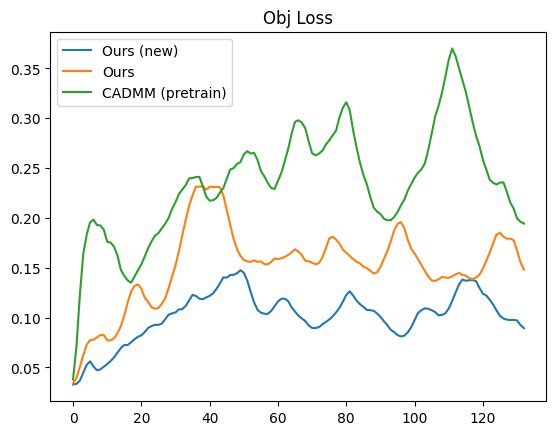

In [26]:
plt.plot(obj_loss_1, label='Ours (new)')
plt.plot(obj_loss_2, label='Ours')
plt.plot(obj_loss_3, label='CADMM (pretrain)')
#plt.plot(obj_loss_4, label='CADMM')

plt.title('Obj Loss')
plt.legend()
plt.show()

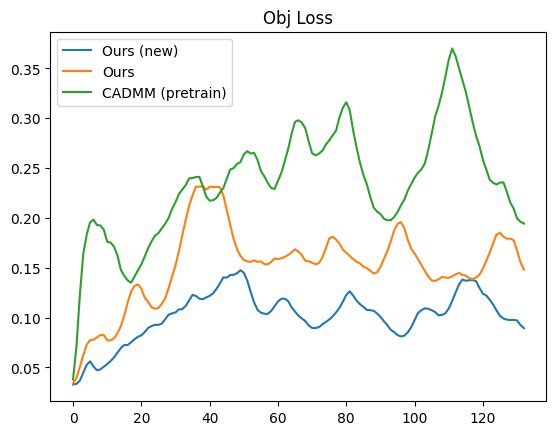

In [ ]:
plt.plot(obj_loss_1, label='Ours (new)')
plt.plot(obj_loss_2, label='Ours')
plt.plot(obj_loss_3, label='CADMM (pretrain)')
#plt.plot(obj_loss_4, label='CADMM')

plt.title('Obj Loss')
plt.legend()
plt.show()

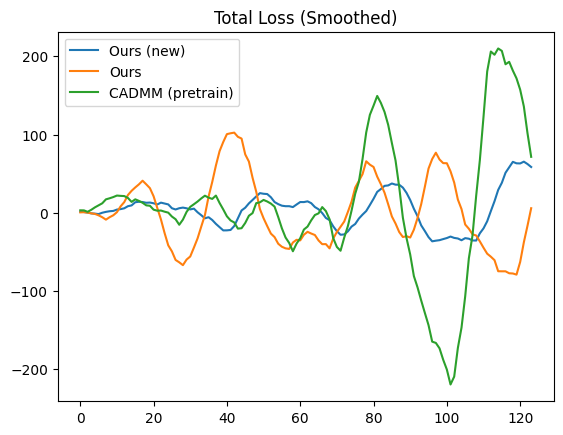

In [30]:
def smooth_curve(loss, window_size=10):  # Adjust window_size as needed
    """Smooths a loss curve using a moving average."""
    return np.convolve(loss, np.ones(window_size)/window_size, mode='valid')

# Smooth the loss curves
smoothed_loss_1 = smooth_curve(total_loss_1)
smoothed_loss_2 = smooth_curve(total_loss_2)
smoothed_loss_3 = smooth_curve(total_loss_3)

# Plot the smoothed curves
plt.plot(smoothed_loss_1, label='Ours (new)')
plt.plot(smoothed_loss_2, label='Ours')
plt.plot(smoothed_loss_3, label='CADMM (pretrain)')
plt.title('Total Loss (Smoothed)') 

plt.legend()
plt.show()

# 3, Communication Analysis

In [34]:
def plot_edge_weights_over_time(G, node, edge_weight_history):
    """
    Plots the edge weights of a given node's neighbors over time as discrete points
    with subplots for each edge, integer x ticks, y ticks only at 0 and 1, and
    the percentage of times the weight was 1 in the title.

    Args:
      node: The node for which to plot edge weights.
      edge_weight_history: A dictionary containing the history of edge weights.
    """
    num_neighbors = len(G.adj[node])
    fig, axes = plt.subplots(num_neighbors, 1, figsize=(10, 2 * num_neighbors))
    if num_neighbors == 1:  # handle case of single neighbor
        axes = [axes]

    neighbor_index = 0
    for neighbor in G.neighbors(node):
        edge = (node, neighbor) if node < neighbor else (neighbor, node)
        weights = edge_weight_history[str(edge)]
        percent_one = sum(weights) / len(weights) * 100  # Calculate percentage of 1s
        ax = axes[neighbor_index]
        ax.plot(weights, 'o', label=f"Edge {edge}")
        ax.set_title(f"Edge {edge} Communication ({percent_one:.1f}%)", fontsize=18)

        ax.set_ylabel("Com On/Off", fontsize=18)
        ax.set_yticks([0, 1])

        # Only show x label and ticks for the last subplot
        if neighbor_index == num_neighbors - 1:
            ax.set_xlabel("Iteration", fontsize=14)
            num_iterations = len(weights)
            ax.set_xticks(range(0, num_iterations, max(1, num_iterations // 10)))
        else:
            ax.set_xticks([])  # Remove x ticks for other subplots

        ax.tick_params(axis='both', which='major', labelsize=18)  # Set tick label size
        neighbor_index += 1

    plt.tight_layout()
    plt.show()


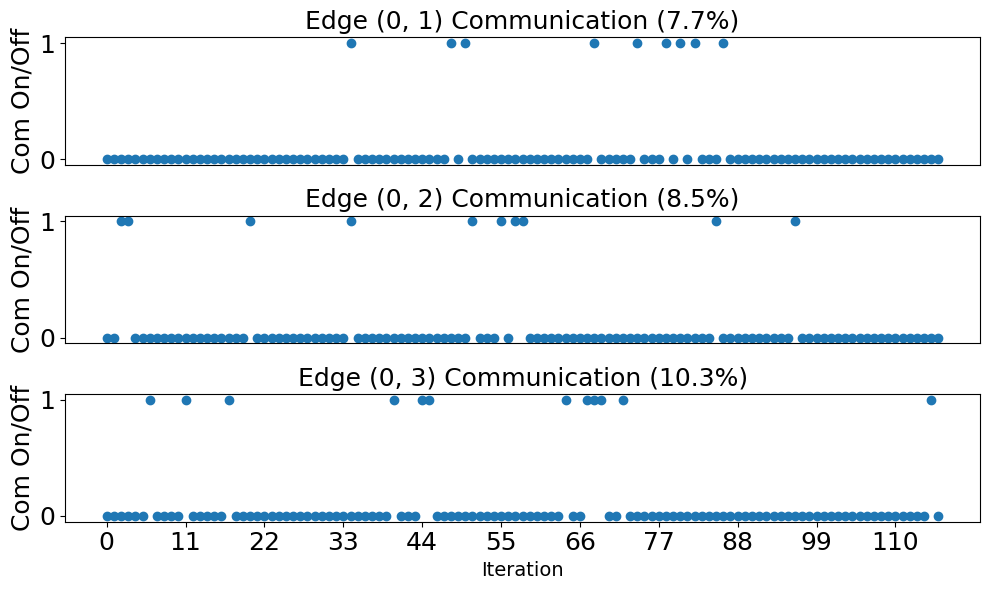

In [35]:

agent_id = 0 
config_path = './configs/ScanNet/scene0106.yaml'
#config_path = './configs/ScanNet/scene0000.yaml'
#edges_list = [[0, 1], [0, 2], [1, 2]]
edges_list = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

cfg = config.load_config(config_path)

# create graph 
G = nx.Graph()
num_agents = cfg['multi_agents']['num_agents']
G.add_nodes_from([i for i in range(num_agents)]) 
G.add_edges_from(edges_list, weight=1)

# Load the saved data from the JSON file
output_path = os.path.join(cfg['data']['output'], cfg['data']['exp_name'])

with open(os.path.join(output_path, 'graph_data.json'), 'r') as f:
    loaded_data = json.load(f)

edge_weight_history = loaded_data['edge_weight_history']

# Example usage: plot edge weights of node 1 over time
plot_edge_weights_over_time(G, agent_id, edge_weight_history)